In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.sparse

from sklearn.preprocessing import StandardScaler

## MNIST

In [3]:
import mnist

In [4]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [5]:
def getLoss(w,x,y,lam):
    m = x.shape[0] #First we get the number of training examples
    y_mat = oneHotIt(y) #Next we convert the integer class coding into a one-hot representation
    scores = np.dot(x,w) #Then we compute raw class scores given our input and current weights
    prob = softmax(scores) #Next we perform a softmax on these scores to get their probabilities
    loss = (-1 / m) * np.sum(y_mat * np.log(prob)) + (lam/2)*np.sum(w*w) #We then find the loss of the probabilities
    grad = (-1 / m) * np.dot(x.T,(y_mat - prob)) + lam*w #And compute the gradient for that loss
    return loss,grad

In [6]:
def oneHotIt(Y):
    m = Y.shape[0]
    #Y = Y[:,0]
    OHX = scipy.sparse.csr_matrix((np.ones(m), (Y, np.array(range(m)))))
    OHX = np.array(OHX.todense()).T
    return OHX

In [7]:
def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm

In [8]:
def getProbsAndPreds(someX):
    probs = softmax(np.dot(someX,w))
    preds = np.argmax(probs,axis=1)
    return probs,preds

In [9]:
x = train_images.reshape((train_images.shape[0], train_images.shape[1] * train_images.shape[2]))
y = train_labels

In [13]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

/home/rahul/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/rahul/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
from tqdm import tqdm_notebook as tqdm

In [ ]:
w = np.zeros([x.shape[1],len(np.unique(y))])
lam = 10
iterations = 50
learningRate = 0.1
losses = []
for i in tqdm(range(iterations)):
    loss,grad = getLoss(w,x,y,lam)
    losses.append(loss)
    w = w - (learningRate * grad)
print('Loss =', loss)
print('||w|| =', np.linalg.norm(w))

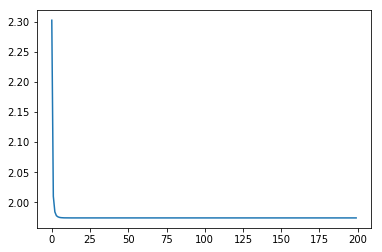

In [30]:
plt.plot(losses)

In [31]:
def getAccuracy(someX,someY):
    prob,prede = getProbsAndPreds(someX)
    accuracy = sum(prede == someY)/(float(len(someY)))
    return accuracy

In [ ]:
print('Training Accuracy: ', getAccuracy(x,y))
print('Test Accuracy: ', getAccuracy(test_images.reshape((test_images.shape[0], test_images.shape[1] * test_images.shape[2])),test_labels))

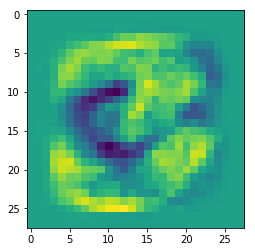

In [41]:
classWeightsToVisualize = 3
plt.imshow(scipy.reshape(w[:,classWeightsToVisualize],[28,28]))

### Regularization term with actual $\lambda$

In [44]:
df = pd.DataFrame(x)
a = df.mean().sum()
b = df.max().mean()
c = (a + b) / 2
print('a =', a, '\nb =', b, '\nc =', c)

a = -3.848218471311227e-14 
b = 31.406671463237505 
c = 15.703335731618733


In [75]:
k = len(np.unique(y))
m = x.shape[0]
L = (k-1) / (k * m) * np.linalg.norm(x) + 7 * 0.2929 # added actual lambda * ||w||

In [76]:
print(L)

2.1486844499910234


In [77]:
w = np.zeros([x.shape[1],len(np.unique(y))])
lam = 5
iterations = 50
learningRate = 1/L
losses = []
for i in tqdm(range(iterations)):
    loss,grad = getLoss(w,x,y,lam)
    losses.append(loss)
    w = w - (learningRate * grad)
print(loss)

/home/rahul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/home/rahul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
/home/rahul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


nan


In [52]:
print('Training Accuracy: ', getAccuracy(x,y))
print('Test Accuracy: ', getAccuracy(test_images.reshape((test_images.shape[0], test_images.shape[1] * test_images.shape[2])),test_labels))

Training Accuracy:  0.7689
Test Accuracy:  0.6702


### Regularization with log approximation for $\lambda$

In [56]:
k = len(np.unique(y))
m = x.shape[0]
L = (k-1) / (k * m) * np.linalg.norm(x) + 10 * np.log(c)
print(L)

27.63711601767537


In [57]:
w = np.zeros([x.shape[1],len(np.unique(y))])
lam = 10
iterations = 100
learningRate = 1/L
losses = []
for i in tqdm(range(iterations)):
    loss,grad = getLoss(w,x,y,lam)
    losses.append(loss)
    w = w - (learningRate * grad)
print(loss)

1.9740823812072157


In [58]:
print('Training Accuracy: ', getAccuracy(x,y))
print('Test Accuracy: ', getAccuracy(test_images.reshape((test_images.shape[0], test_images.shape[1] * test_images.shape[2])),test_labels))

Training Accuracy:  0.7689
Test Accuracy:  0.6702


# Experiments

## iris

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [29]:
x, y = load_iris(return_X_y=True)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

In [39]:
k = len(np.unique(y))
m = x_train.shape[0]

In [40]:
L = (k - 1) / (k * m) * np.linalg.norm(x_train)
print('Learning rate =', 1/L)

Learning rate = 1.935878668751384


In [41]:
w = np.random.randn(x_train.shape[1],len(np.unique(y_train)))
lam = 0
iterations = 200
learningRate = 0.1
losses = []
for i in tqdm(range(iterations)):
    loss,grad = getLoss(w,x_train,y_train,lam)
    losses.append(loss)
    w = w - (learningRate * grad)
print(loss)

0.25911241815346614


In [42]:
print('Accuracy:', getAccuracy(x_test, y_test))

Accuracy: 0.9333333333333333


In [43]:
w = np.random.randn(x_train.shape[1],len(np.unique(y_train)))
lam = 0
iterations = 200
learningRate = 1/L
losses = []
for i in tqdm(range(iterations)):
    loss,grad = getLoss(w,x_train,y_train,lam)
    losses.append(loss)
    w = w - (learningRate * grad)
print(loss)

0.19879592981453598


In [44]:
print('Accuracy:', getAccuracy(x_test, y_test))

Accuracy: 0.9777777777777777


## Digits

In [45]:
from sklearn.datasets import load_digits

In [46]:
x, y = load_digits(return_X_y=True)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

In [48]:
w = np.random.randn(x_train.shape[1],len(np.unique(y_train)))
lam = 0
iterations = 200
learningRate = 0.1
losses = []
for i in tqdm(range(iterations)):
    loss,grad = getLoss(w,x_train,y_train,lam)
    losses.append(loss)
    w = w - (learningRate * grad)
print(loss)

0.3292777397287393


In [49]:
print('Accuracy:', getAccuracy(x_test, y_test))

Accuracy: 0.912962962962963


In [50]:
k = len(np.unique(y))
m = x_train.shape[0]
L = (k - 1) / (k * m) * np.linalg.norm(x_train)

In [51]:
w = np.random.randn(x_train.shape[1],len(np.unique(y_train)))
lam = 0
iterations = 200
learningRate = 1/L
losses = []
for i in tqdm(range(iterations)):
    loss,grad = getLoss(w,x_train,y_train,lam)
    losses.append(loss)
    w = w - (learningRate * grad)
print(loss)

/home/rahul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/home/rahul/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


0.17956434386041076


In [52]:
print('Accuracy:', getAccuracy(x_test, y_test))

Accuracy: 0.9462962962962963


In [53]:
print('Learning rate =', 1/L)

Learning rate = 0.6349478016005805
